# About Dataset

One goal of the research study was to explore ways to promote student retention in high schools by accomodating effective instructional practices - here, co-teaching, in science classrooms. 

This dataset contains data from an experiment that I designed with the goal of evaluating how students perceive co-teaching (one popular way of promoting collaboration among teachers) in Chinese high school chemistry classrooms. 

High school students in this sc

hool were randomly assigned to chemistry teachers. In the control group, two teachers cooporated in the classroom; this means that they showed up without co-planning of the lesson or prior discussion on how the lesson should go. In the experimental group, two teachers collborated; meaning that they co-planned the lesson and share their responsibilities during teaching. 

In total, 186 valid data points were collected. Students answer a set of questions with 6-point Likert-scale (to avoid midground - neutral in the responses).

- Gender - female, male
- Coteach - no (teachers cooperated with each other), yes (teachers collaborated with each other)
- Experience - students have a good experience 
- LearnGain  - learned more than you usually do 
- LikeCoteach - students would like to be co-taught by two or more teachers in the classroom
- InteractWT - students interact with teachers more frequently when co-taught
- Engage - students feel more engaged in learning when co-taught
- Attention - students get more attention from the teachers when co-taught
- School - whether students would choose to go to schools where students are co-taught: an indicator for retention

# Goal:

- In this notebook, I use the gathered data to predict the likelihood of a student would go to a co-teahing school with the measured factors. 
    - Here, I aim to minimize False Positives, as too many False Positives may lead to un-reasonable planing of education resources the schools have. So, I will focus on improving Precision - How "precise" the classifier is when predicting positive instances.

# Import libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns 

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline                 

# Import data

In [2]:
# read data
df = pd.read_csv('coteach_data_original.csv')
df.head()

,Unnamed: 0,Gender,Age,Experience,LearnGain,LikeCoteach,InteractWT,Engage,Attention,School,Coteach
0,female,female,16,5,5,4,5,5,5,5,no
1,1,female,14,4,1,1,1,1,1,4,no
2,2,male,15,1,2,3,2,3,3,1,no
3,3,female,15,5,5,5,4,6,6,6,no
4,4,male,15,4,2,2,4,4,4,5,no


In [3]:
# Create categories for Target Variable
cat = [df['School'].isin([4,5,6]),
      df['School'].isin([1,2,3])]

# define category 
cat_name = ['yes', 'no']

# create a new column
df['Attend'] = np.select(cat, cat_name)

# check the data
df.head()

,Unnamed: 0,Gender,Age,Experience,LearnGain,LikeCoteach,InteractWT,Engage,Attention,School,Coteach,Attend
0,female,female,16,5,5,4,5,5,5,5,no,yes
1,1,female,14,4,1,1,1,1,1,4,no,yes
2,2,male,15,1,2,3,2,3,3,1,no,no
3,3,female,15,5,5,5,4,6,6,6,no,yes
4,4,male,15,4,2,2,4,4,4,5,no,yes


In [4]:
# Create categories for Target Variable
cat = [df['School'].isin([4,5,6]),
      df['School'].isin([1,2,3])]

# define category 
cat_name = ['yes', 'no']

# create a new column
df['Attend'] = np.select(cat, cat_name)

# check the data
df.head()

,Unnamed: 0,Gender,Age,Experience,LearnGain,LikeCoteach,InteractWT,Engage,Attention,School,Coteach,Attend
0,female,female,16,5,5,4,5,5,5,5,no,yes
1,1,female,14,4,1,1,1,1,1,4,no,yes
2,2,male,15,1,2,3,2,3,3,1,no,no
3,3,female,15,5,5,5,4,6,6,6,no,yes
4,4,male,15,4,2,2,4,4,4,5,no,yes


In [5]:
# Drop the ID column
df = df.drop(['Unnamed: 0','School'], axis = 1)
df.head()

,Gender,Age,Experience,LearnGain,LikeCoteach,InteractWT,Engage,Attention,Coteach,Attend
0,female,16,5,5,4,5,5,5,no,yes
1,female,14,4,1,1,1,1,1,no,yes
2,male,15,1,2,3,2,3,3,no,no
3,female,15,5,5,5,4,6,6,no,yes
4,male,15,4,2,2,4,4,4,no,yes


# EDA

In [6]:
# check missing values
df.isnull().sum()

Gender         0
Age            0
Experience     0
LearnGain      0
LikeCoteach    0
InteractWT     0
Engage         0
Attention      0
Coteach        0
Attend         0
dtype: int64

- There are no missing values

In [7]:
# Check the overall description 
df.describe().round(2)

,Age,Experience,LearnGain,LikeCoteach,InteractWT,Engage,Attention
count,180.00,180.00,180.00,180.00,180.00,180.00,180.00
mean,15.06,4.28,3.87,3.97,4.22,4.21,4.12
std,0.59,1.50,1.71,1.77,1.68,1.64,1.68
min,14.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,15.00,4.00,2.00,2.00,3.00,3.00,3.00
50%,15.00,5.00,4.00,5.00,5.00,4.50,4.00
75%,15.00,5.00,5.00,6.00,6.00,6.00,6.00
max,16.00,6.00,6.00,6.00,6.00,6.00,6.00


It shows that:

    - Students aged from 14 to 16, with most students aged 15.
    - Overall, when two teachers showed up in the classroom, students tended to have better experience, gain more attettion, better interact with teachers.

### Examine the gender influence

In [8]:
# check unique values in 'Gender' column
df['Gender'].unique()

array(['female', 'male'], dtype=object)

In [9]:
# check the counts of male/ female participants
df['Gender'].value_counts()

female    94
male      86
Name: Gender, dtype: int64

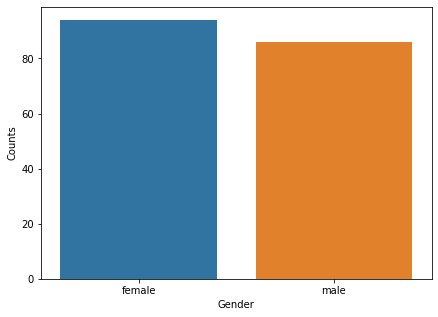

In [10]:
# plot the counts based on gender
plt.figure(figsize=[7,5])
sns.countplot(x = 'Gender', data = df)
plt.xlabel('Gender', fontsize = 10)
plt.ylabel('Counts', fontsize = 10);

- The ratio of female and male stduents is: 94/86 = 1.09, which is almost 1:1, roughly equal size.

In [11]:
# check some descriptive stats based on gender
df.groupby('Gender').mean().round(2)

,Age,Experience,LearnGain,LikeCoteach,InteractWT,Engage,Attention
Gender,,,,,,,
female,15.07,4.50,4.09,4.17,4.40,4.46,4.37
male,15.05,4.03,3.64,3.76,4.01,3.93,3.84


It seems that there is a difference in gender in terms of how students perceive the lesson. 

### Examine the 'Attend' feature

<AxesSubplot:xlabel='Attend', ylabel='count'>

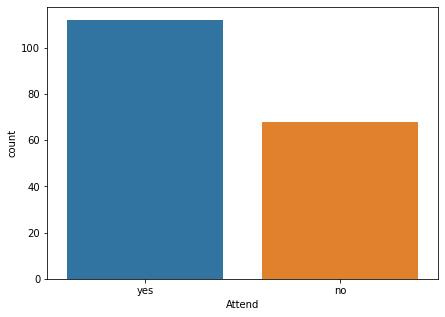

In [12]:
# examine the countplots
plt.figure(figsize=[7,5])
sns.countplot(x = 'Attend', data = df)

In [13]:
# examine number of students who want to attend co-teaching schools and those do not
df['Attend'].value_counts()

yes    112
no      68
Name: Attend, dtype: int64

In [14]:
# examine the stats based on Target Var
df.groupby('Attend').mean().round(2)

,Age,Experience,LearnGain,LikeCoteach,InteractWT,Engage,Attention
Attend,,,,,,,
no,14.99,3.01,2.37,2.38,3.03,2.9,2.88
yes,15.11,5.04,4.79,4.94,4.94,5.0,4.87


It does show that:

    - the better the overall perception a student had in terms of Experience, LearnGain, LikeCoteach, InteractWT, Engage, and Attention, during the co-taught lesson, the more likely they want to attend coteaching schools

### Encode Categorical Variables

In [15]:
# encode the 'Gender' and 'Coteach' column and drop the initial col
df_encoded = pd.get_dummies(df, columns=['Gender', 'Coteach','Attend'], drop_first=True)
df_encoded.head()

,Age,Experience,LearnGain,LikeCoteach,InteractWT,Engage,Attention,Gender_male,Coteach_yes,Attend_yes
0,16,5,5,4,5,5,5,0,0,1
1,14,4,1,1,1,1,1,0,0,1
2,15,1,2,3,2,3,3,1,0,0
3,15,5,5,5,4,6,6,0,0,1
4,15,4,2,2,4,4,4,1,0,1


# Check correlation

In [16]:
# see correlation results
corr = df_encoded.corr().round(2)
display(corr)

,Age,Experience,LearnGain,LikeCoteach,InteractWT,Engage,Attention,Gender_male,Coteach_yes,Attend_yes
Age,1.00,0.08,0.30,0.16,0.20,0.20,0.20,-0.02,-0.03,0.10
Experience,0.08,1.00,0.76,0.72,0.80,0.81,0.70,-0.16,0.65,0.66
LearnGain,0.30,0.76,1.00,0.78,0.71,0.84,0.72,-0.13,0.48,0.69
LikeCoteach,0.16,0.72,0.78,1.00,0.69,0.73,0.66,-0.12,0.56,0.70
InteractWT,0.20,0.80,0.71,0.69,1.00,0.87,0.86,-0.12,0.69,0.55
Engage,0.20,0.81,0.84,0.73,0.87,1.00,0.86,-0.16,0.60,0.62
Attention,0.20,0.70,0.72,0.66,0.86,0.86,1.00,-0.16,0.62,0.57
Gender_male,-0.02,-0.16,-0.13,-0.12,-0.12,-0.16,-0.16,1.00,-0.01,-0.17
Coteach_yes,-0.03,0.65,0.48,0.56,0.69,0.60,0.62,-0.01,1.00,0.47
Attend_yes,0.10,0.66,0.69,0.70,0.55,0.62,0.57,-0.17,0.47,1.00


<AxesSubplot:>

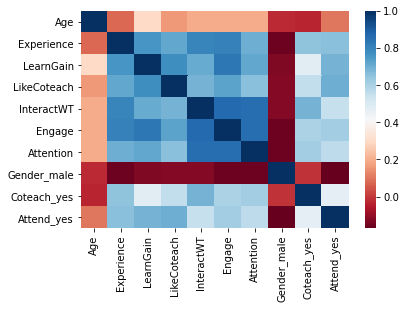

In [17]:
# data visualization - correlation heatmap 
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = 'RdBu')

- Here, I did not care about the colinearity very much, as I am not aiming to find the feature importance.
Instead, I wanted to know to what extend these features can help predict the Target Variable with different algorithms. 

# Build the models 

In [18]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, r2_score
from sklearn.metrics import auc, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

In [19]:
# define variables
X = df_encoded.drop('Attend_yes', axis = 1)
y = df_encoded[['Attend_yes']]

# split data into Train and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### 1. Logistic Regression

In [20]:
# train the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# make predictions
y_pred = logreg.predict(X_test)

In [21]:
# classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75        13
           1       0.84      0.91      0.87        23

    accuracy                           0.83        36
   macro avg       0.83      0.80      0.81        36
weighted avg       0.83      0.83      0.83        36



In [22]:
# check value counts in y_test
y_test.value_counts()

Attend_yes
1             23
0             13
dtype: int64

In [23]:
# confusion metrix
metrics.confusion_matrix(y_test, y_pred)

array([[ 9,  4],
       [ 2, 21]])

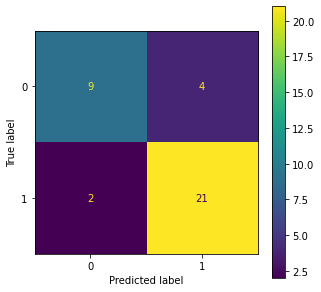

In [24]:
# plot confusion metrix
ig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(logreg, X_test, y_test, ax=ax)

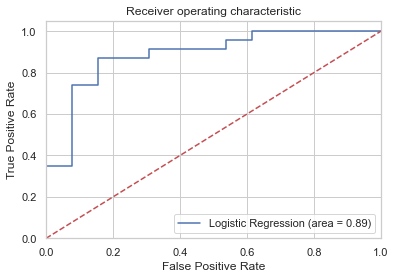

--------------------------------------------------
The area under the curve is: 0.89
--------------------------------------------------


In [25]:
# ROC Curve:
plt.rc("font", size=20)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

logreg_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logreg_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print('-'*50)
print("The area under the curve is:", roc_auc_score(y_test,logreg.predict_proba(X_test)[:,1]).round(2))
print('-'*50)

In [26]:
# 5-fold cross validation 
kf = KFold(n_splits=5, shuffle=False).split(range(25))
scores = cross_val_score(logreg, X, y, cv=5)
print(scores)
print(scores.mean()) 
print(scores.std()) 
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


[0.83333333 0.94444444 0.80555556 0.97222222 0.75      ]
0.861111111111111
0.08425417160057277
Accuracy: 0.86 (+/- 0.17)


### 2. Random Forest

In [27]:
# Random forest
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

# predictions
rfc_pred_train = rfc.predict(X_train)
rfc_pred = rfc.predict(X_test)

In [28]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       1.00      0.91      0.95        23

    accuracy                           0.94        36
   macro avg       0.93      0.96      0.94        36
weighted avg       0.95      0.94      0.95        36



In [29]:
print(confusion_matrix(y_test, rfc_pred))

[[13  0]
 [ 2 21]]


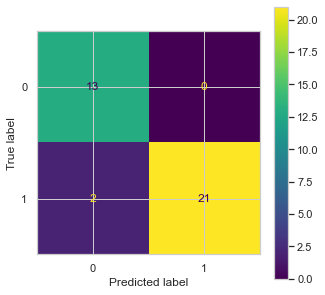

In [30]:
# plot confusion metrix
ig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(rfc, X_test, y_test, ax=ax)

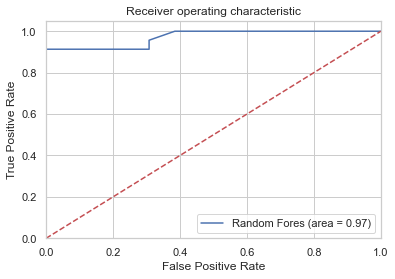

--------------------------------------------------
The area under the curve is: 0.97
--------------------------------------------------


In [31]:
# ROC Curve:
plt.rc("font", size=20)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

rfc_roc_auc = roc_auc_score(y_test, rfc.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Fores (area = %0.2f)' % rfc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print('-'*50)
print("The area under the curve is:", roc_auc_score(y_test,rfc.predict_proba(X_test)[:,1]).round(2))
print('-'*50)

In [32]:
# 5-fold cross validation 
kf = KFold(n_splits=5, shuffle=False).split(range(25))
scores = cross_val_score(rfc, X, y, cv=5)
print(scores)
print(scores.mean()) 
print(scores.std()) 
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[1.         1.         0.97222222 1.         1.        ]
0.9944444444444445
0.011111111111111117
Accuracy: 0.99 (+/- 0.02)


### 3. Gradient Boosted Classifier

In [33]:
# Random forest
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

In [34]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       1.00      0.91      0.95        23

    accuracy                           0.94        36
   macro avg       0.93      0.96      0.94        36
weighted avg       0.95      0.94      0.95        36



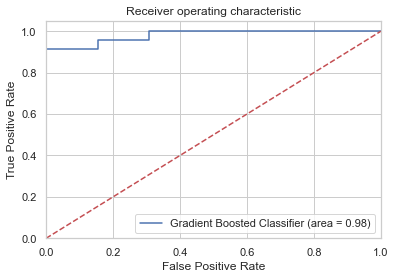

--------------------------------------------------
The area under the curve is: 0.98
--------------------------------------------------


In [35]:
# ROC Curve:
plt.rc("font", size=20)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

gb_roc_auc = roc_auc_score(y_test, gb.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, gb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosted Classifier (area = %0.2f)' % gb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print('-'*50)
print("The area under the curve is:", roc_auc_score(y_test, gb.predict_proba(X_test)[:,1]).round(2))
print('-'*50)

In [36]:
# 5-fold cross validation 
kf = KFold(n_splits=5, shuffle=False).split(range(25))
scores = cross_val_score(gb, X, y, cv=5)
print(scores)
print(scores.mean()) 
print(scores.std()) 
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


[1. 1. 1. 1. 1.]
1.0
0.0
Accuracy: 1.00 (+/- 0.00)


# Summary

In [37]:
# create a summary dataframe for the results
models = [logreg, rfc, gb]
train_accu =[metrics.accuracy_score(y_train, model.predict(X_train)).round(2) for model in models]
test_accu =[metrics.accuracy_score(y_test, model.predict(X_test)).round(2) for model in models]
precision =[metrics.precision_score(y_test, model.predict(X_test)).round(2) for model in models]
recall =[metrics.recall_score(y_test, model.predict(X_test)).round(2) for model in models]
roc = [roc_auc_score(y_test, model.predict_proba(X_test)[:,1]).round(2) for model in models]

# convert into dataframe
rest = pd.DataFrame([train_accu, test_accu, precision, recall, roc], 
                    columns = ['logistic_regression','random_forest','gradient_boost'], 
                    index=['accu_train', 'accu_test','precision', 'recall','roc'])
print(rest)

            logistic_regression  random_forest  gradient_boost
accu_train                 0.90           1.00            1.00
accu_test                  0.83           0.94            0.94
precision                  0.84           1.00            1.00
recall                     0.91           0.91            0.91
roc                        0.89           0.97            0.98


**Overall:**

- Random Forest(RF) and Gradient Boosted Classifier(GBC) perform equally well, with 94% accuracy, 100% precision, and 91% recall; both perfomed better than Logistic Regression(LR) which has 83% accuracy, 84% precision and 91% recall.
    - This makes sense, the features are mostly categorical in this case, and both RF and GBC are better than LR.
    
- As mentioned above, I aim to improve Precision (How "precise" the classifier is when predicting positive instances) by minimizing False Positives. Both RF and GBC have very good precisions (100%), therefore, both model could work very well.

# Limitations and Improvement

In this study:

- The number of measured features was still small. More features such as features/measures about the school culture and support from stakeholders could be measured and further added to predict the likelihood of a student would go to a co-teahing school. 

- There was limited data. More data points from different school districts could be gathered to ensure the diversity of the partipants and schools. This will help improve the generalibility of the results. 